In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [9]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [10]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.149286,-0.921346,-0.125859,1.859230,1.586251,0
1,0.628353,1.387112,1.535159,3.344018,1.310800,0
2,-1.723779,1.113829,-1.442798,1.408623,0.977578,0
3,-2.386374,-0.157786,-2.952417,-2.472818,0.208015,0
4,-0.402152,2.467803,-2.170562,0.096312,0.912096,0


In [11]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [13]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [14]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-12-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-12-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-12-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col3', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')


In [29]:
df3

,col1,col3,target
49,0.807869,0.630663,1
79,-0.255207,0.979334,0
32,0.073074,2.836354,1
57,1.128689,-1.090239,0
55,-0.623363,-0.919121,0
66,1.436253,2.693777,1
17,1.431390,2.104295,1
55,-0.623363,-0.919121,0
6,-1.148893,5.017810,1
7,-0.716411,2.504958,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[0] <= -0.359\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.7, 'x[1] <= -1.1\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.7, 'x[1] <= 1.978\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[1] <= 0.739\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.75, 0.3, 'x[1] <= 0.974\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

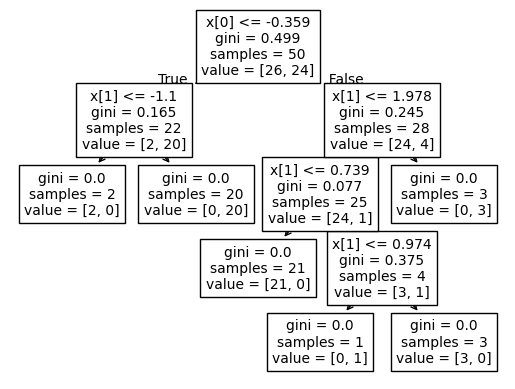

In [22]:
plot_tree(clf1)

[Text(0.4, 0.875, 'x[0] <= -1.047\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[1] <= -0.463\ngini = 0.32\nsamples = 35\nvalue = [7, 28]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 1.754\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]')]

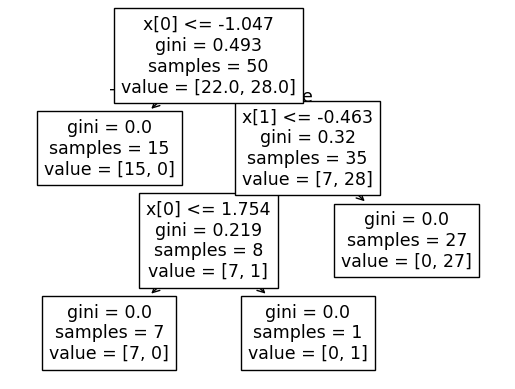

In [23]:
plot_tree(clf2)

[Text(0.4166666666666667, 0.9375, 'x[1] <= -0.012\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.25, 0.8125, 'x[0] <= 1.472\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.33333333333333337, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'x[0] <= 0.416\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.08333333333333333, 0.5625, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.25, 0.5625, 'x[0] <= 0.539\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5833333333333334, 0.8125, 'x[0] <= -1.285\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.5, 0.875, '  False'),
 Text(0.5, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.6875, 'x[1] <= 1.721\ngini = 0.337\nsamples = 28\nvalue = [6,

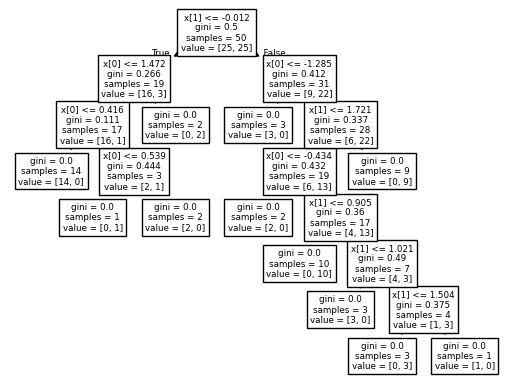

In [24]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
25,-1.278817,2.266972,1.906181,-1.413913,-2.144848,1
18,-0.088378,1.666559,-2.947251,0.059558,0.063832,0
27,-1.975413,1.616362,-0.724102,1.317825,0.959456,0
23,0.828239,1.292095,0.713379,-0.682640,-0.951415,1
48,1.221394,0.658566,-1.445401,-1.275104,-1.226865,1
16,1.315182,0.377197,-2.467344,2.736149,2.142244,0
61,-0.237901,0.415371,3.005510,-0.554552,-0.310032,1
11,0.819276,3.128874,-5.058423,-0.156395,0.721165,0
81,2.112114,0.108858,1.916772,-1.264112,-0.613126,1
43,-0.845128,2.353130,-3.276059,-1.636895,0.488845,0
